# **Praktikum Data Mining Modul 5**
### Nama : Rafi Fadhlillah
### NIM : 121450143

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Praktikum 1 : Implementasi Klasifikasi Naïve Bayes Support Vector Machine (SVM)**

### 1. Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### 2. Import data

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/PrakDamin/Modul 5/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 3. Data Analysis / Preprocessing

a) Drop data (menghapus kolom/atribut yang tidak dibutuhkan)

In [ ]:
to_drop = ["User ID"]
df = df.drop(to_drop, axis=1)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


b) Deskripsi data

In [ ]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


c) Distribusi data

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

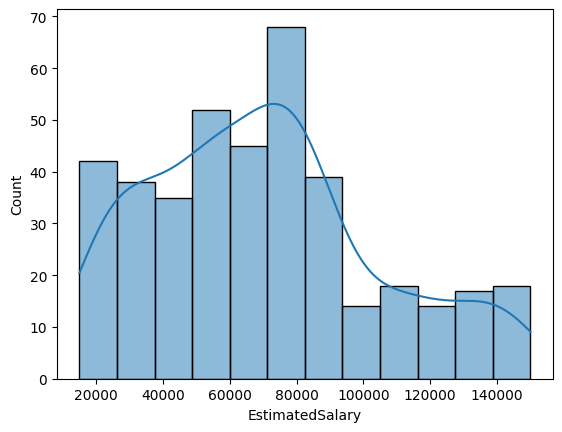

In [ ]:
sns.histplot(df['EstimatedSalary'], kde = True)

d) Label encoding

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df['Gender'].replace({'Male':1, 'Female':0},inplace = True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


e) Correlation matrix

In [ ]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


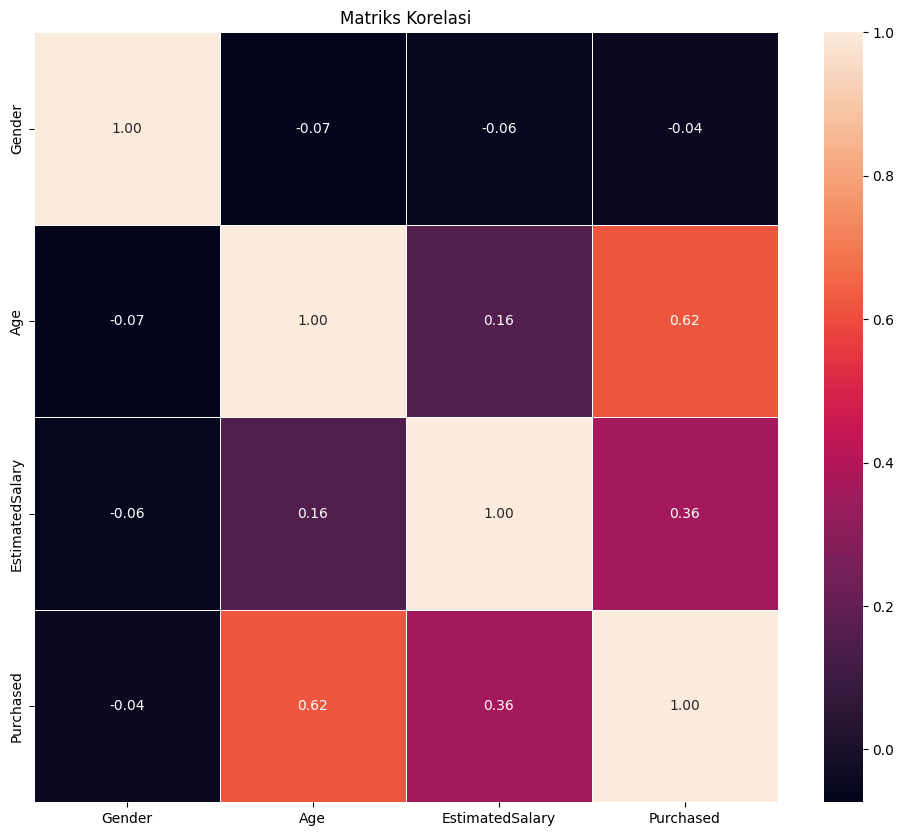

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

### 4. Split data

a) Variabel Independen / Dependen

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into dependent/independent variables
X = df[['Age','EstimatedSalary']].values
y = df.iloc[:, -1].values

b) Train / Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((300, 2), (100, 2))

### 5. Feature scaling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6. Train model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### 7. Predict result / Score model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


### 8. Evaluasi model

a) Akurasi


In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.86


b) Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.88      0.88      0.88        58
           1       0.83      0.83      0.83        42

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



c) F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.8333333333333334


d) Confusion matrix

<Axes: >

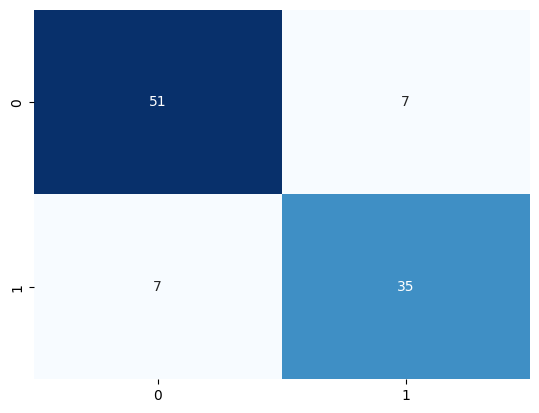

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

Secara umum, hasil confusion matrix ini menunjukkan bahwa model klasifikasi memiliki kinerja yang baik. Model klasifikasi berhasil mengklasifikasikan sebagian besar data uji dengan benar.

e) Precision-Recall curve

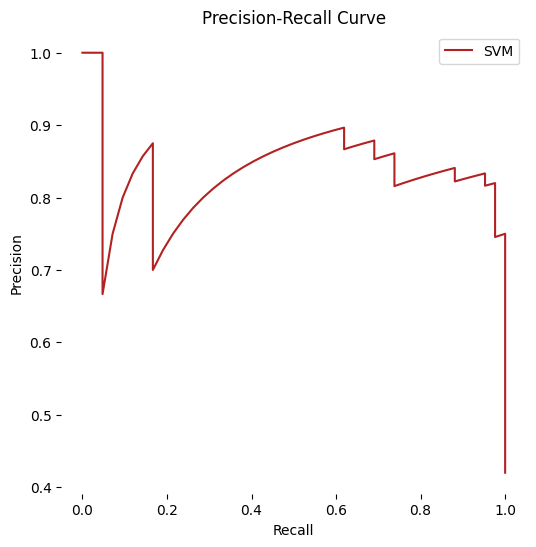

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

f) AUC/ROC curve

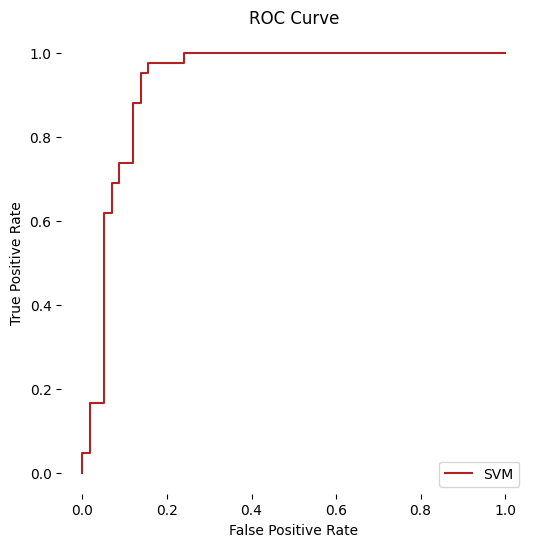

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### 9. Visualization predictions

 - Prediction results on the training set

<ipython-input-23-a7aaf071ac03>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


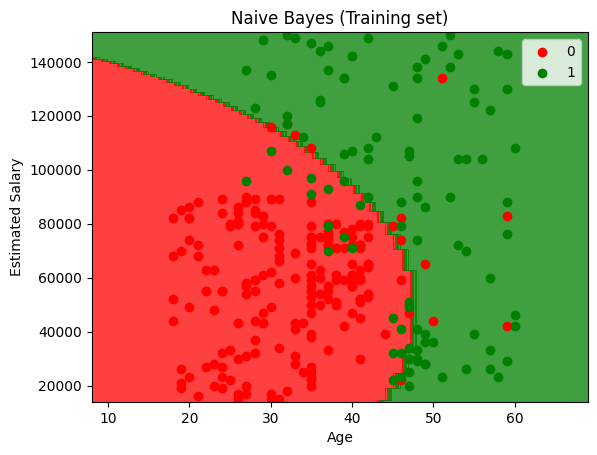

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

- Prediction results on the test set

<ipython-input-24-d8c11ec0d50a>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


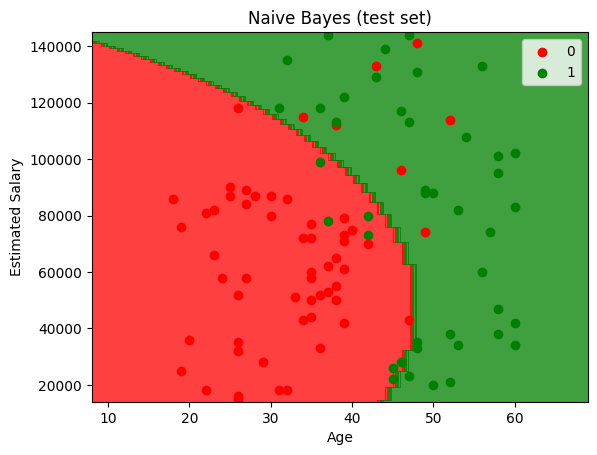

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 10. Example
Sebagai contoh kita cek untuk Usia 45 tahun dan Gaji 97000 dan periksa apakah
pengguna kemungkinan akan membeli asuransi atau tidak.

In [ ]:
print(classifier.predict(sc.transform([[45, 97000]])))

[1]


Nilai prediksi [1] berarti pengguna akan membeli asuransi

# **Praktikum 2 : Implementasi Klasifikasi Support Vector Machine(SVM)**

### 1. Import libraries

In [ ]:
from sklearn.svm import SVC

### 2. Import data

In [ ]:
import pandas as pd

df2 = pd.read_csv('/content/drive/MyDrive/PrakDamin/Modul 5/Social_Network_Ads.csv')
df2.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 3. Data Analysis / Preprocessing

a) Drop data (menghapus kolom/atribut yang tidak dibutuhkan)


In [ ]:
to_drop = ["User ID"]
df2 = df2.drop(to_drop, axis=1)
df2.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


b) Deskripsi data

In [ ]:
df2.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


c) Distribusi data

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

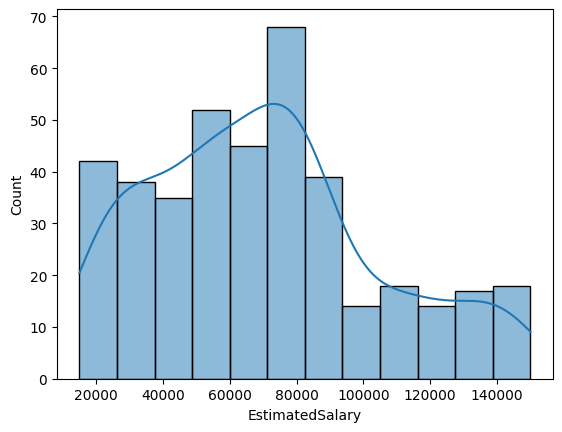

In [ ]:
sns.histplot(df2['EstimatedSalary'], kde = True)

d) Label encoding

In [ ]:
df2['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df2['Gender'].replace({'Male':1, 'Female':0},inplace = True)
df2.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


e) Correlation matrix

In [ ]:
df2.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


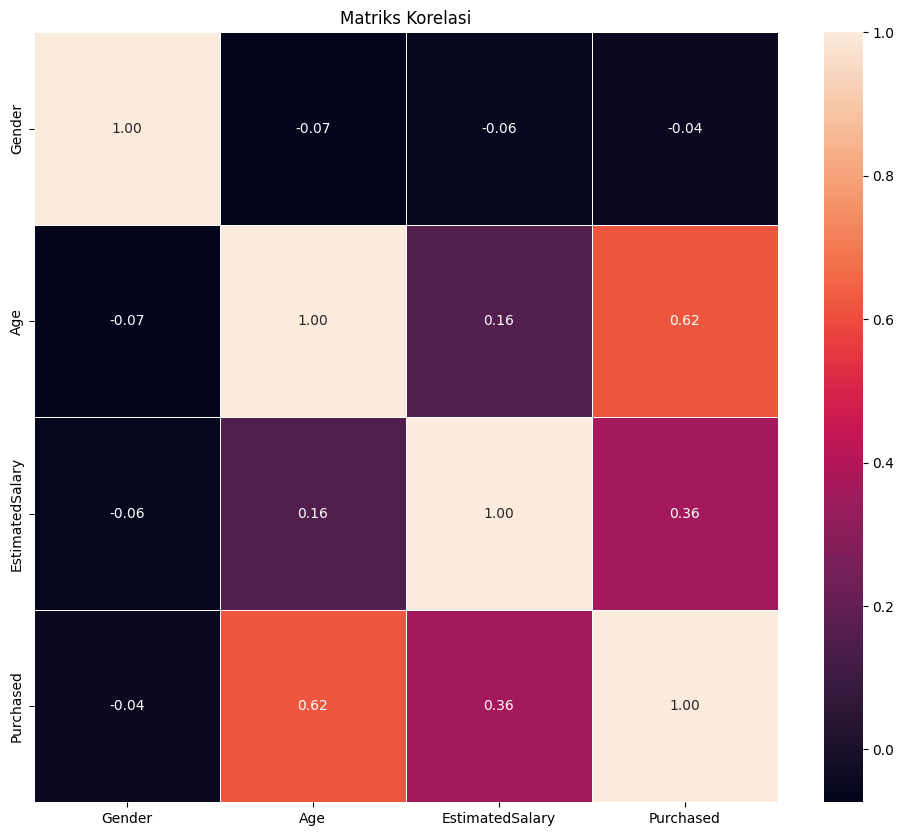

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df2.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

### 4. Split data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Split data into dependent/independent variables
X = df2[['Age','EstimatedSalary']].values
y = df2.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((300, 2), (100, 2))

### 5. Features Scalling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6. Train model

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### 7. Predict result / Score model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]]


### 8. Evaluasi model

a) Akurasi

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.82


b) Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.90      0.85        58
           1       0.83      0.71      0.77        42

    accuracy                           0.82       100
   macro avg       0.82      0.81      0.81       100
weighted avg       0.82      0.82      0.82       100



c) F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.7692307692307692


d) Confusion matrix

<Axes: >

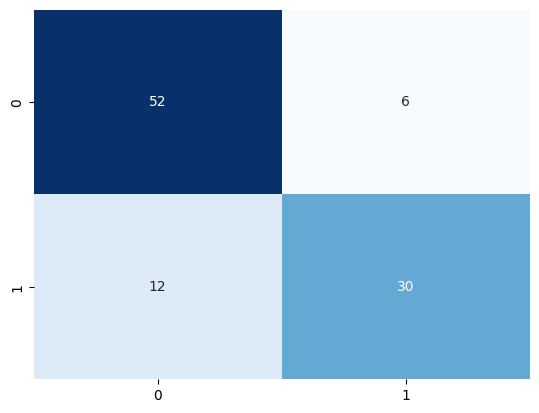

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

Secara umum, hasil confusion matrix ini menunjukkan bahwa model klasifikasi memiliki kinerja yang baik. Model klasifikasi berhasil mengklasifikasikan sebagian besar data uji dengan benar.

e) Precision-Recall curve

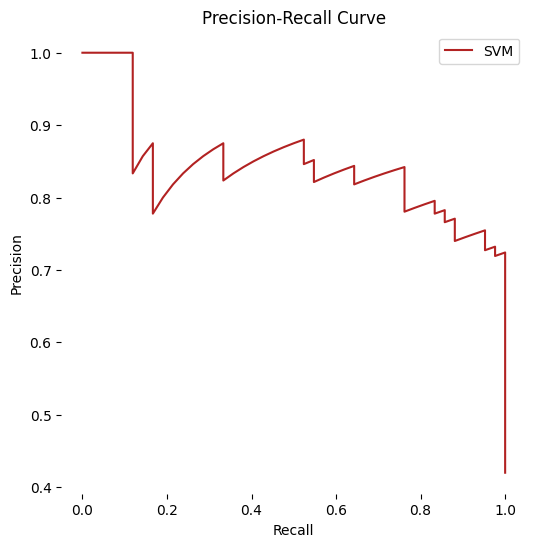

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

f) AUC/ROC curve

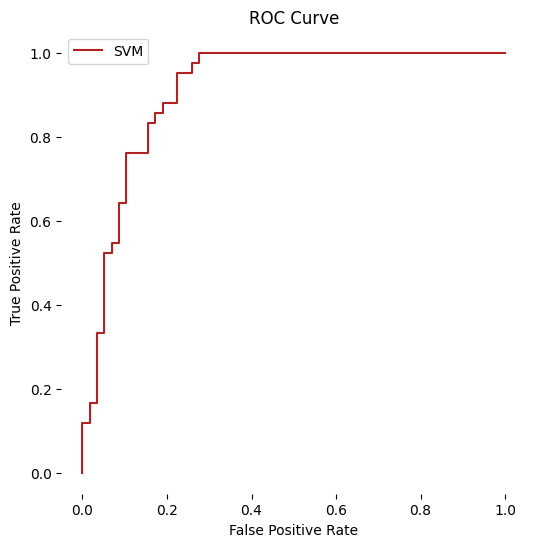

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### 9. Visualization predictions


- Prediction results on the training set

<ipython-input-46-ae93a1145478>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


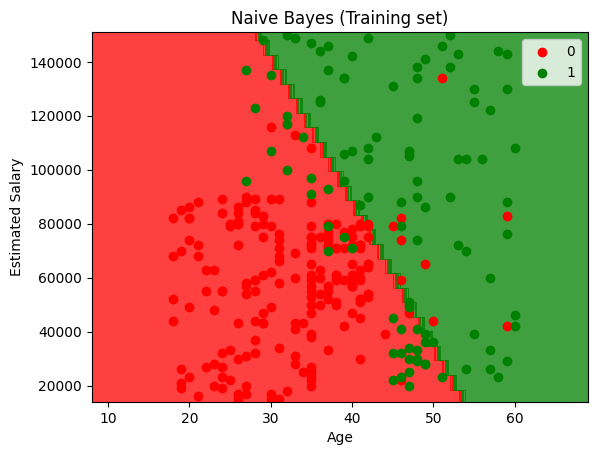

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

- Prediction results on the test set

<ipython-input-47-cce53031fa2d>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


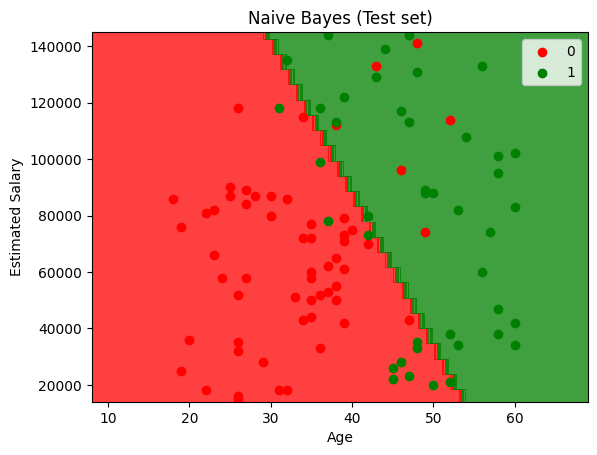

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### 10. Example
Sebagai contoh kita cek untuk Usia 45 tahun dan Gaji 97000 dan periksa apakah
pengguna kemungkinan akan membeli asuransi atau tidak.

In [ ]:
print(classifier.predict(sc.transform([[45, 97000]])))

[1]


 nilai prediksi [1] berarti pengguna akan membeli asuransi.


# **Tugas Individu**
## a) Dengan menggunakan dataset Social_Network_Ads.csv selesaikan semua langkah-langkah yang ada pada modul ini, kemudain lakukan analisis perbandingan hasil evaluasi performa penggunaan model Naïve Bayes dan Support Vector Machine (SVM)!



**1. Akurasi** :

- Naive Bayes: 86%
- SVM: 82%

Analisis Hasil Evaluasi : <br>
Model Naive Bayes memiliki akurasi yang sedikit lebih tinggi dibandingkan SVM. Akurasi mencerminkan sejauh mana model dapat memprediksi secara benar pada keseluruhan dataset.

**2. Presisi, Recall, dan F1-Score** : <br>
- Kelas 0 (positif): SVM memiliki presisi yang sedikit lebih rendah tetapi recall yang lebih tinggi dibandingkan Naive Bayes. Ini berarti SVM cenderung lebih baik dalam mengidentifikasi instance positif dari kelas 0, meskipun dengan lebih banyak false positives. <br><br>
- Kelas 1 (negatif): Naive Bayes memiliki presisi, recall, dan F1-Score yang lebih baik dibandingkan SVM. Ini menunjukkan bahwa Naive Bayes lebih baik dalam mengidentifikasi instance dari kelas 1.


**3. F1-Score Rata-rata (Weighted Avg)** :
- Naive Bayes: 0.86
- SVM: 0.82

Analisis Hasil Evaluasi : <br>
F1-Score rata-rata adalah metrik yang memberikan keseluruhan keseimbangan antara presisi dan recall. Naive Bayes memiliki F1-Score rata-rata yang lebih tinggi, menunjukkan performa keseluruhan yang lebih baik dibandingkan SVM.

## b) Pilih minimal 3 dataset yang ada pada http://bit.ly/45VVB6X . Kemudian lakukan klasifikasi dengan model Naïve Bayes dan Support Vector Machine (SVM)!. Analisis data dengan hasil yang anda dapatkan !. Buat laporan dalam file PDF yang berisi: <br>
i) Deskripsikan dan eksplor data yang anda pilih, <br>
ii) flowchart praktikum, <br>
iii) hasil (berupa tabel) dan analisis hasil
(deadline 2 hari)


# **Flowchart**

## Naive bayes

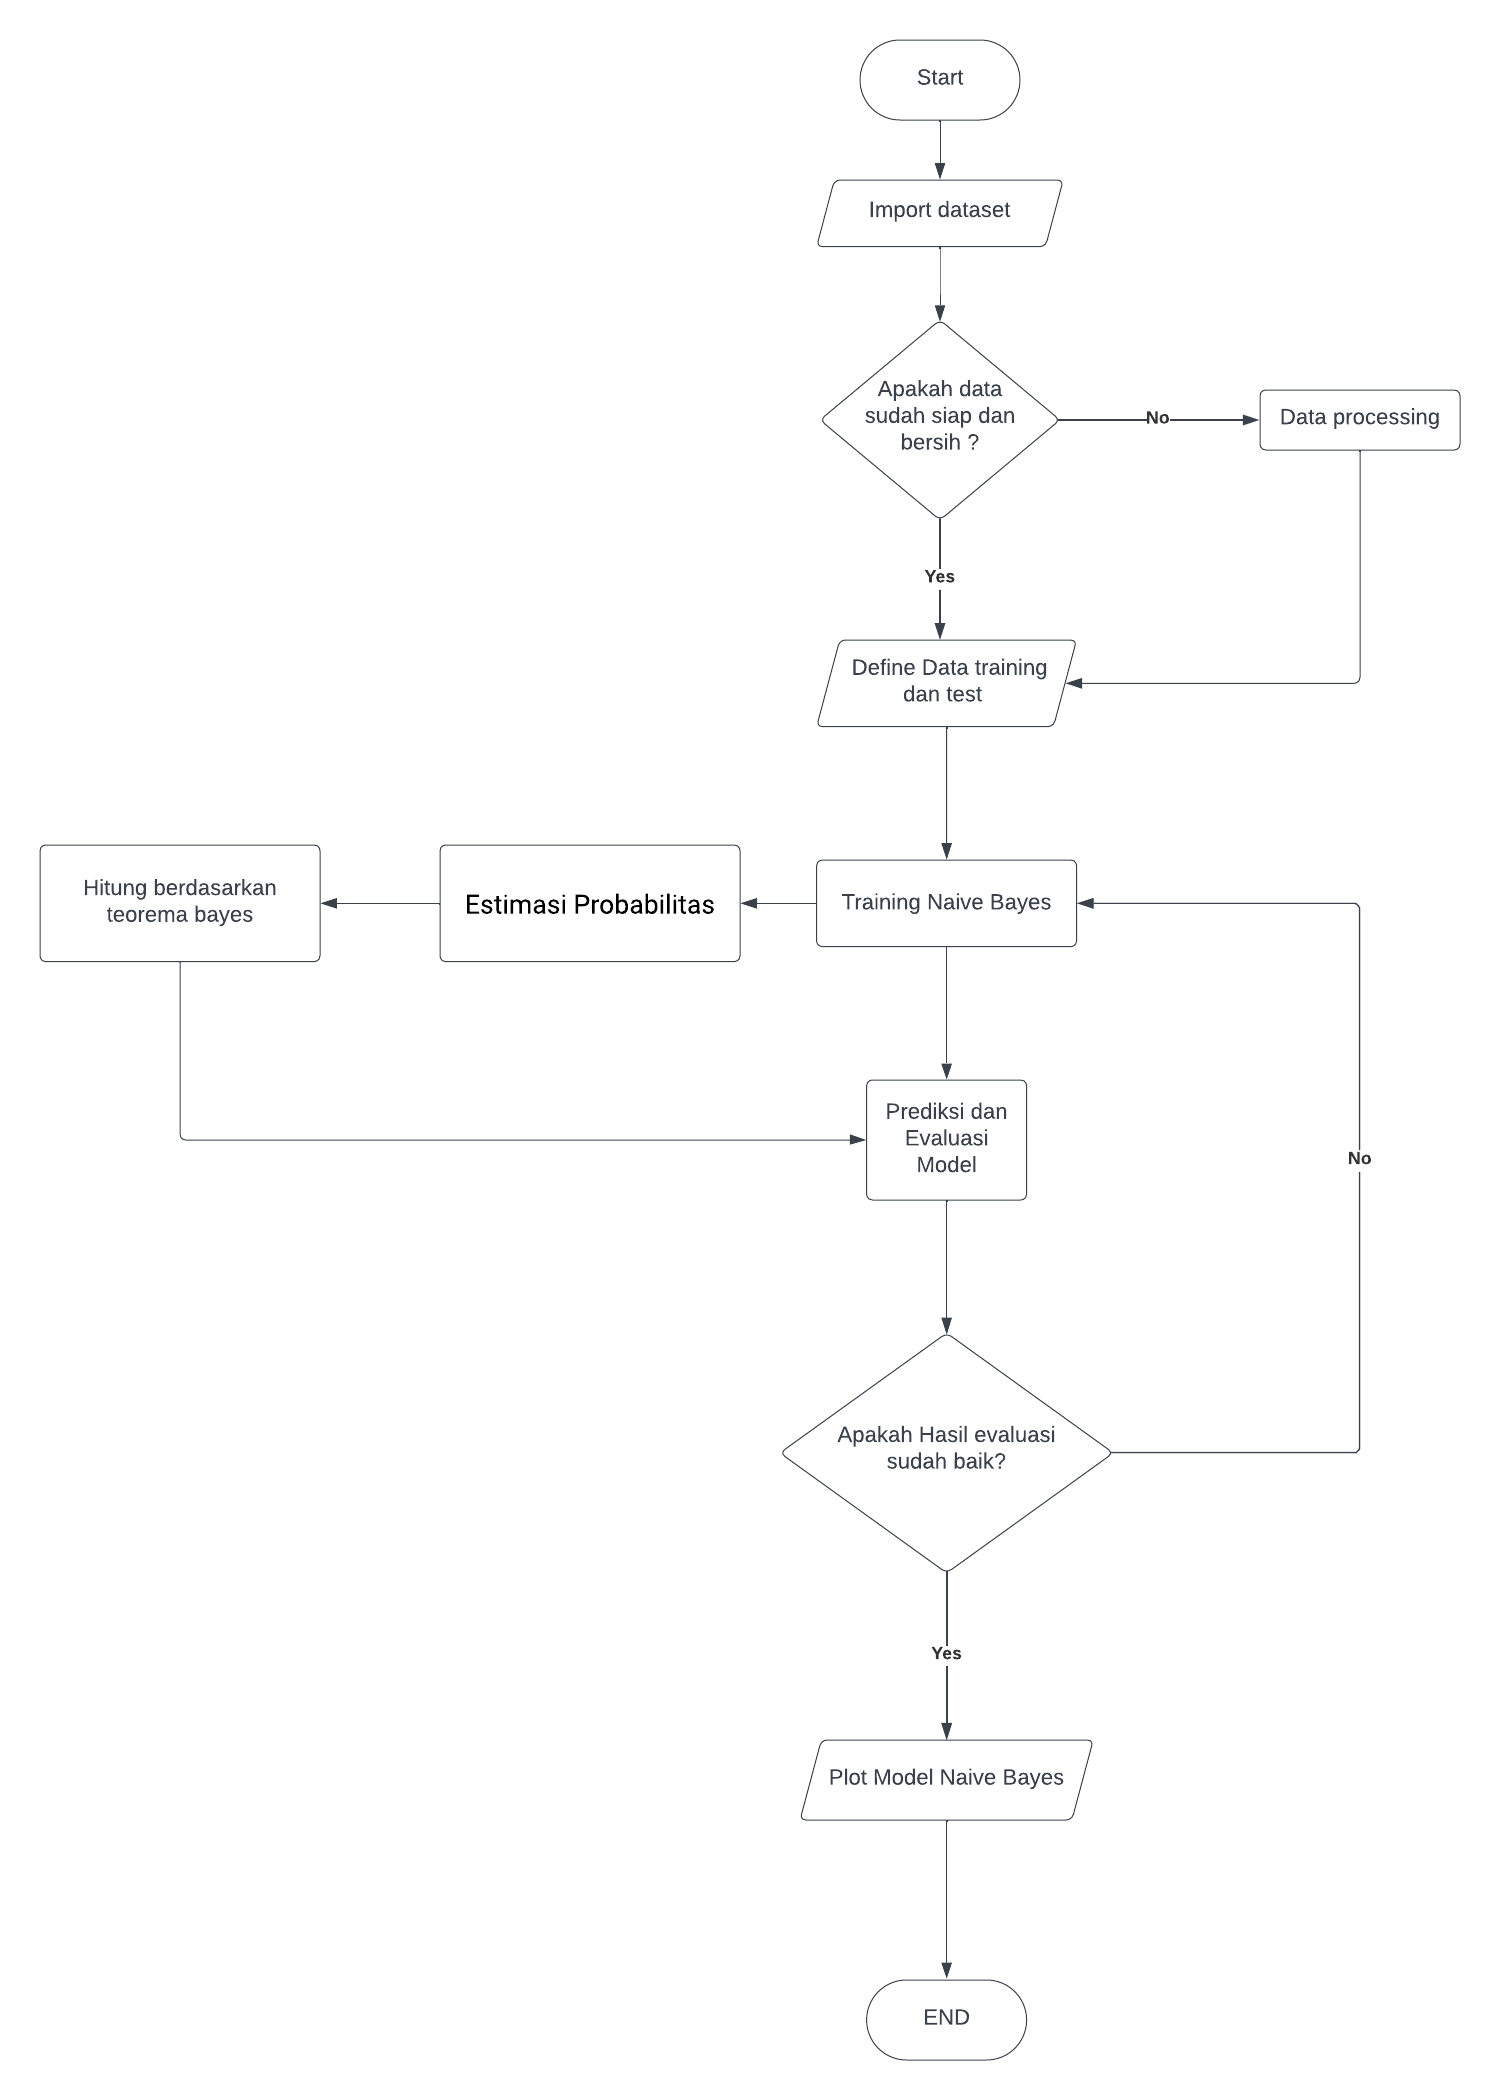

## SVM

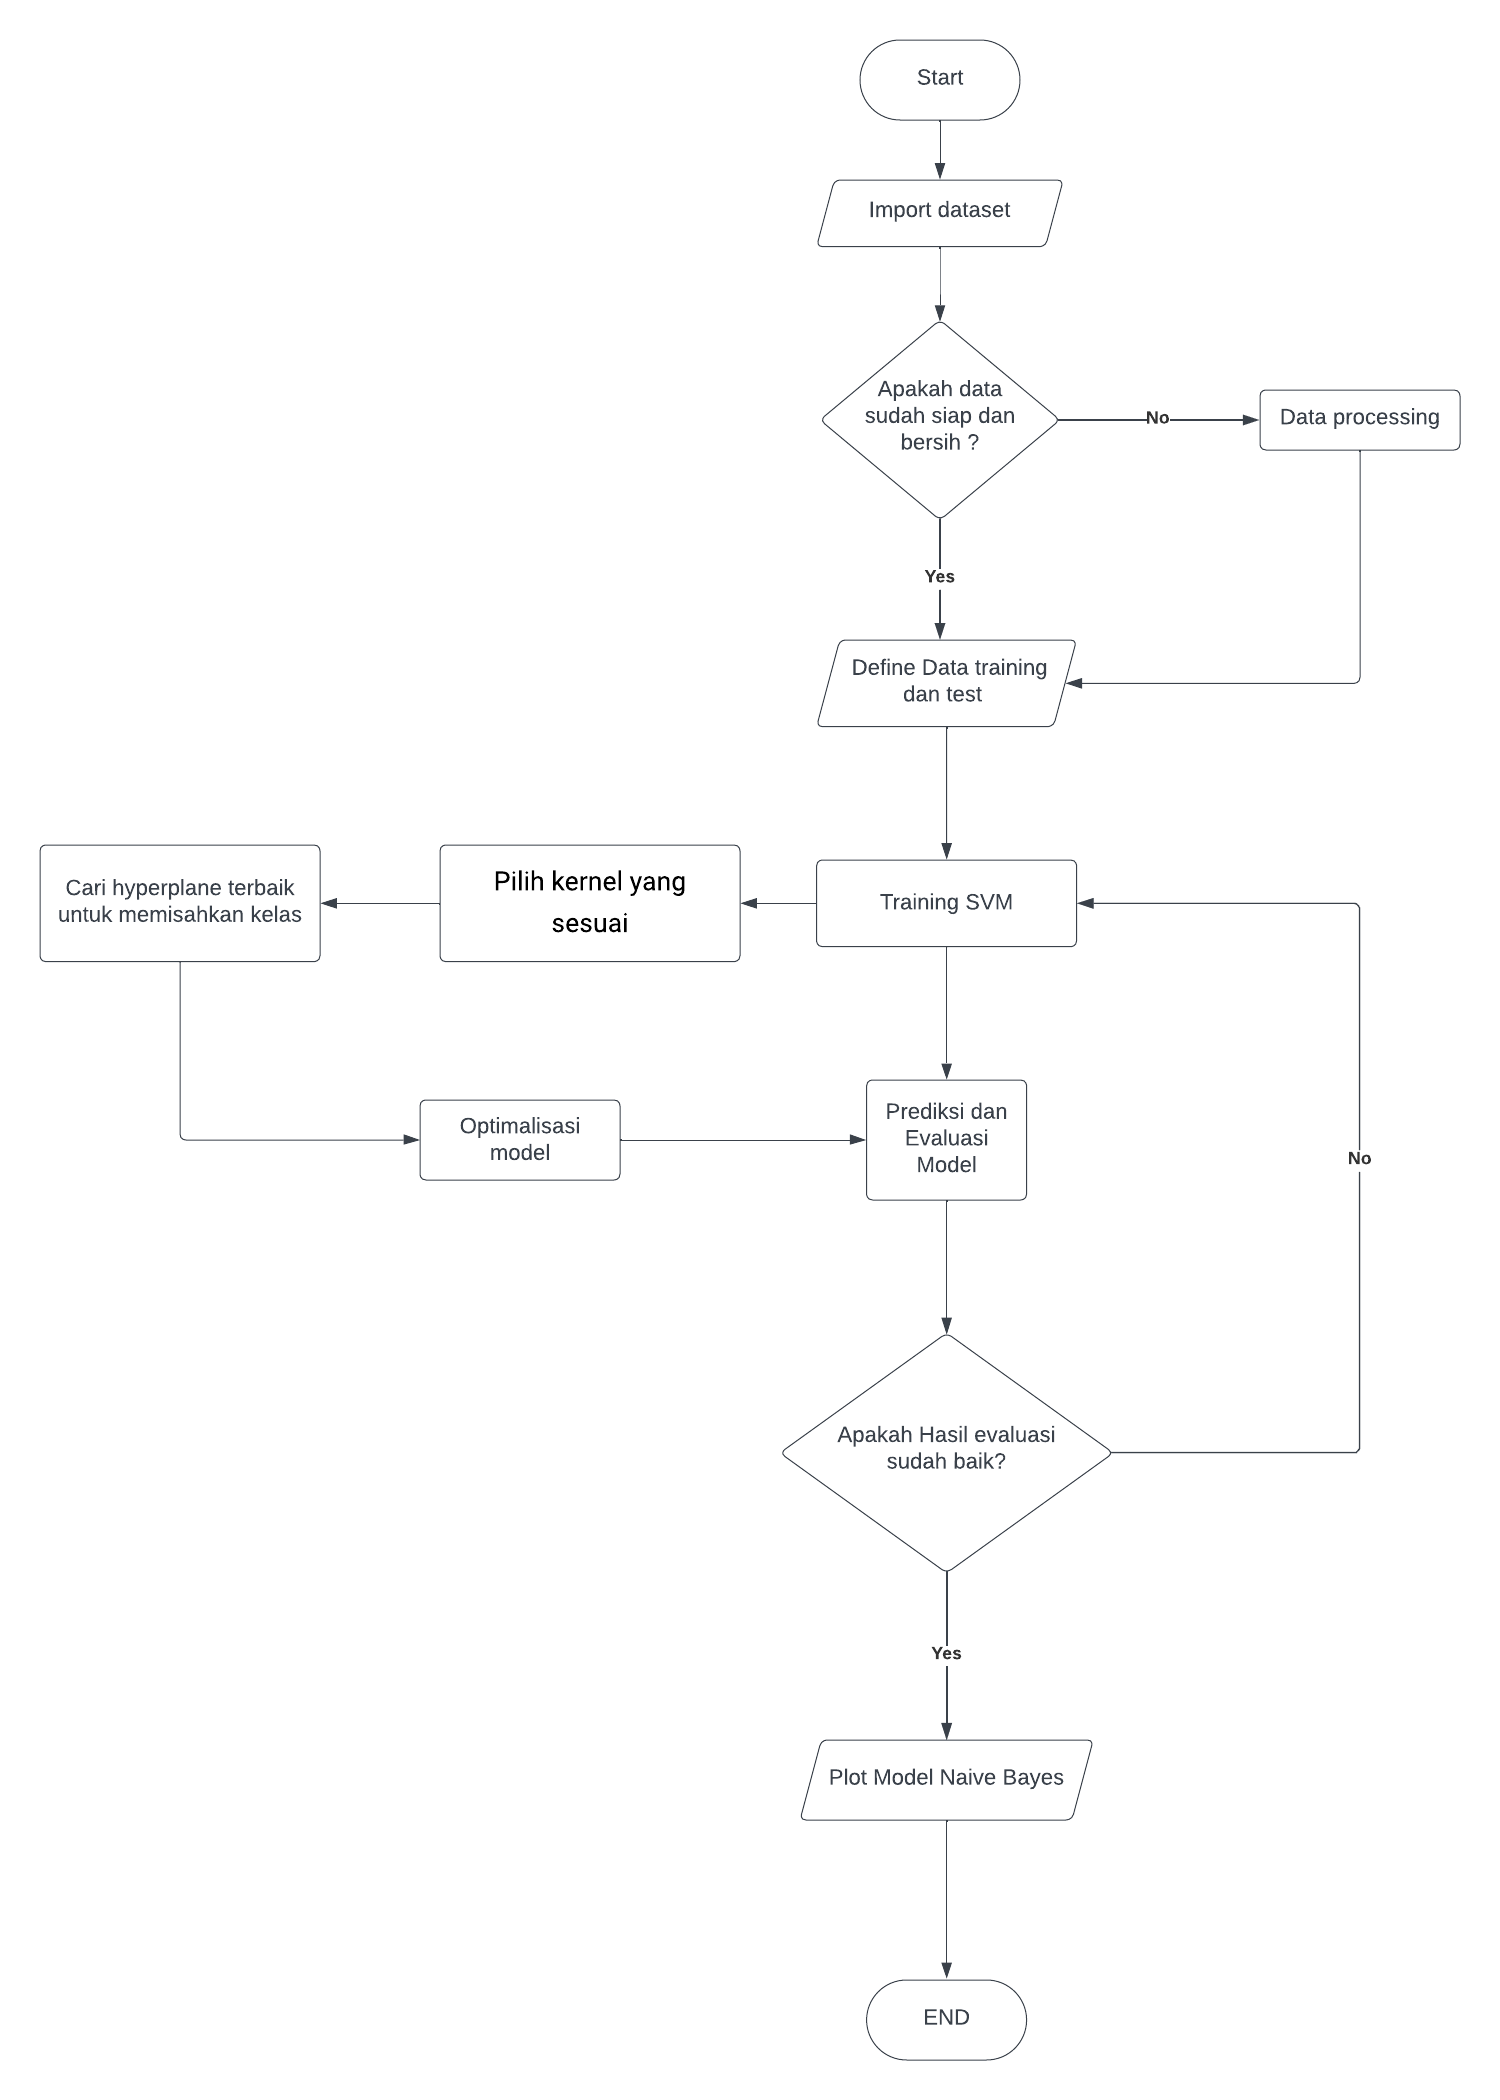

# **Tabel Perbandingan Evaluasi Dataset 1,2, dan 3**


| Dataset | Model         | Accuracy | Precision (Class 0) | Recall (Class 0) | F1-Score (Class 0) | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | Macro Avg | Weighted Avg |
|---------|---------------|----------|----------------------|------------------|---------------------|----------------------|------------------|---------------------|-----------|--------------|
| 1       | Naive Bayes   | 0.97     | 0.97                 | 0.97             | 0.97                | 0.97                 | 0.97             | 0.97                | 0.97      | 0.97         |
| 1       | SVM           | 0.97     | 0.97                 | 0.97             | 0.97                | 0.97                 | 0.97             | 0.97                | 0.97      | 0.97         |
| 2       | Naive Bayes   | 0.75     | 0.76                 | 0.90             | 0.82                | 0.73                 | 0.48             | 0.58                | 0.74      | 0.75         |
| 2       | SVM           | 0.77     | 0.77                 | 0.91             | 0.83                | 0.76                 | 0.51             | 0.61                | 0.76      | 0.77         |
| 3       | Naive Bayes   | 0.59     | 0.61                 | 0.82             | 0.70                | 0.50                 | 0.25             | 0.33                | 0.55      | 0.56         |
| 3       | SVM           | 0.59     | 0.59                 | 1.00             | 0.74                | 0.00                 | 0.00             | 0.00                | 0.29      | 0.34         |


# **Dataset 1 : Penguins.csv**

Deskripsi Dataset : <br>
Dataset ini tampaknya berisi informasi tentang penguin, di mana setiap baris mewakili satu penguin dengan berbagai kolom memberikan pengukuran dan karakteristik. Berikut adalah deskripsi singkat untuk setiap kolom: <br>

* bill_length: Panjang paruh penguin.
* bill_depth: Kedalaman atau tebal paruh penguin.
* flipper_length: Panjang sirip penguin.
* body_mass: Massa atau berat badan penguin.
* species: Spesies dari penguin.

### 1. Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

### Loading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PrakDamin/penguins.csv")
df.head()

,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


### Data Preprocessing

a) drop data

In [ ]:
df = df.drop(["Unnamed: 0"], axis=1)
df.head()

,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


b) Deskripsi Data

In [ ]:
df.describe()

,bill_length,bill_depth,flipper_length,body_mass
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


c) Distribusi data

<Axes: xlabel='body_mass', ylabel='Count'>

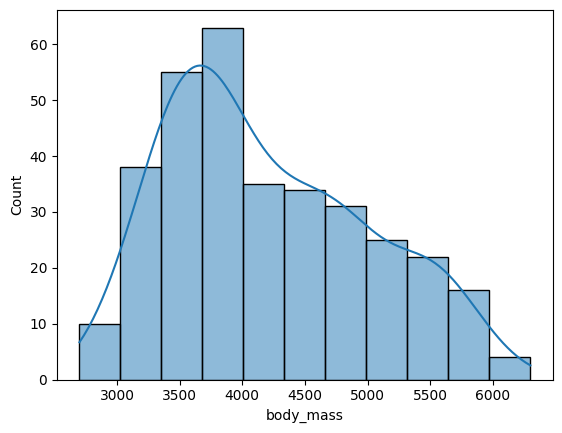

In [ ]:
sns.histplot(df['body_mass'], kde = True)

d) Label Encoding

In [ ]:
df_categorical = df.select_dtypes(exclude = [np.number])#membueat  variabel yang berisi tabel tanpa kolom yang memiliki tipe data numerik
df_categorical

,species
0,Adelie
1,Adelie
2,Adelie
3,Adelie
4,Adelie
...,...
328,Chinstrap
329,Chinstrap
330,Chinstrap
331,Chinstrap


In [ ]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [ ]:
df = df[df['species'] != 'Chinstrap']
df.replace({'Adelie': 0, 'Gentoo': 1},inplace = True)

<ipython-input-56-3c7f21fca52d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'Adelie': 0, 'Gentoo': 1},inplace = True)


e) Corelation Matrix

In [ ]:
df.corr()

,bill_length,bill_depth,flipper_length,body_mass,species
bill_length,1.000000,-0.543166,0.870276,0.876786,0.835607
bill_depth,-0.543166,1.000000,-0.634645,-0.483227,-0.830812
flipper_length,0.870276,-0.634645,1.000000,0.884427,0.900277
body_mass,0.876786,-0.483227,0.884427,1.000000,0.822667
species,0.835607,-0.830812,0.900277,0.822667,1.000000


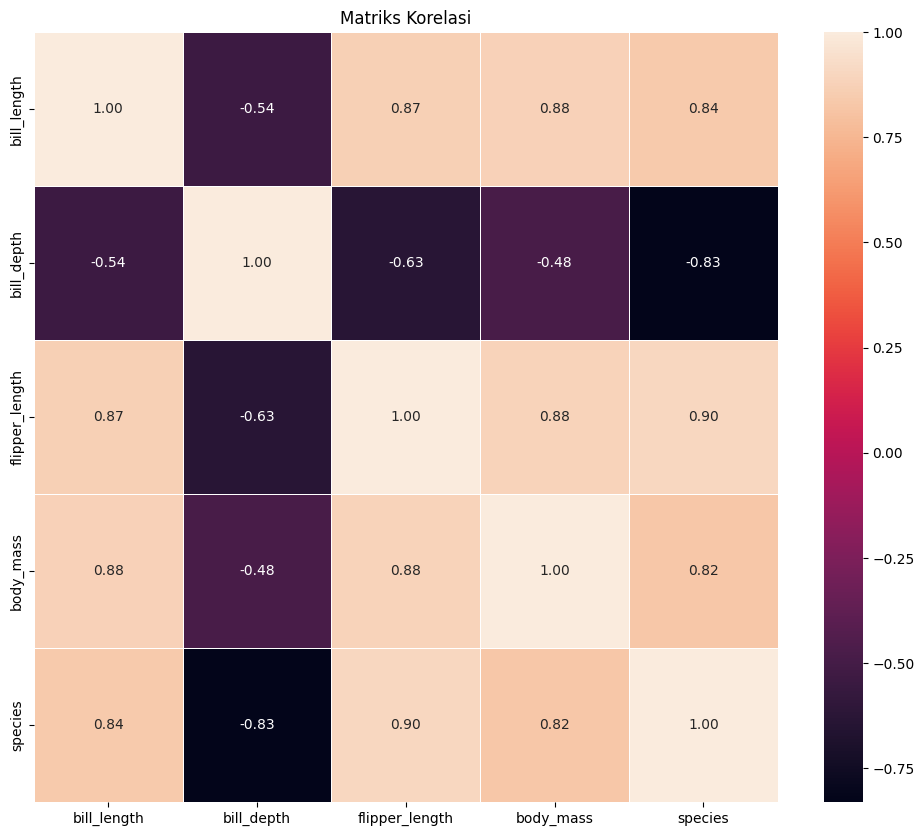

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

### 4. Split Data

In [ ]:
# Split data into dependent/independent variables
X = df[['body_mass','bill_length']].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((198, 2), (67, 2))

### 5. Features Scalling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### 6. Train Model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### 7. Predict result/ Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


### 8. Model Evaluation

Accuracy

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.97


Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.97      0.97      0.97        31

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.967741935483871


Confusion Matrix

<Axes: >

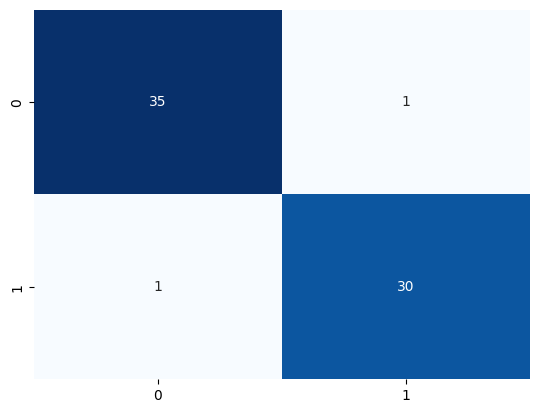

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

Precision-Recall curve

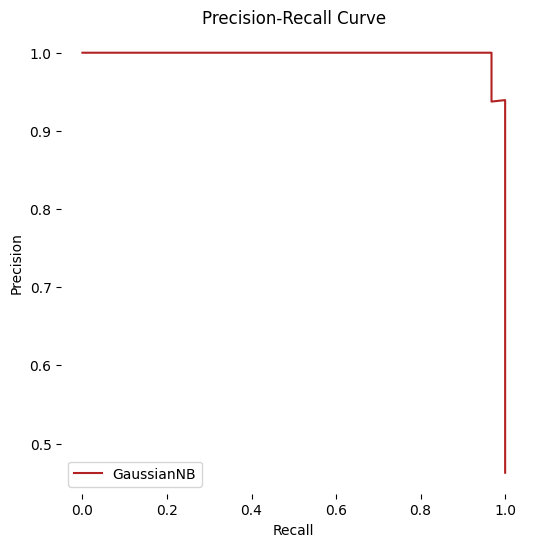

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='GaussianNB', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

AUC/ROC Curve

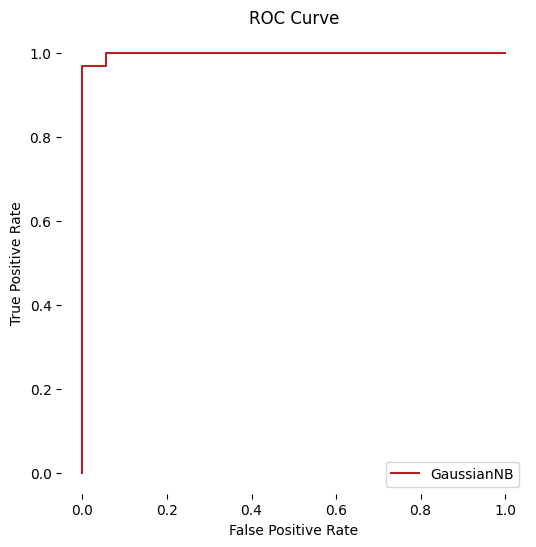

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='GaussianNB', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

9. Visualization predictions

<ipython-input-70-998b7165757e>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


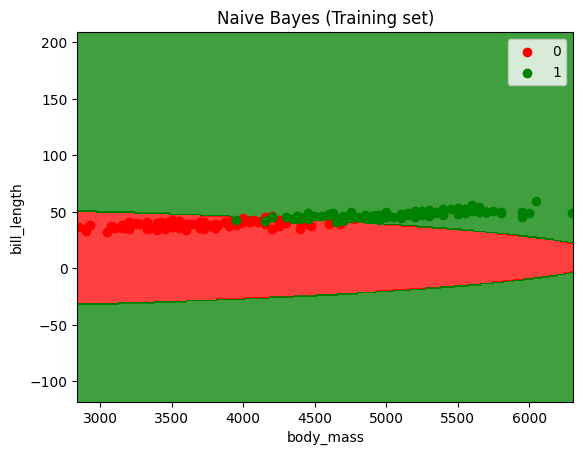

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 150, stop = X_set[:, 1].max() + 150, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('body_mass')
plt.ylabel('bill_length')
plt.legend()
plt.show()

In [ ]:
print(classifier.predict(sc.transform([[45, 5300]])))

[1]


## **Implementasi Klasifikasi Support Vector Machine(SVM)**

### Split Data

In [ ]:
# Split data into dependent/independent variables
X = df[['body_mass','bill_length']].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((198, 2), (67, 2))

### Features Scalling


In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predict result/ Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]]


### Model Evaluation

Accuracy

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.97


Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.97      0.97      0.97        31

    accuracy                           0.97        67
   macro avg       0.97      0.97      0.97        67
weighted avg       0.97      0.97      0.97        67



F1 Score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.967741935483871


Confusion Matrix

<Axes: >

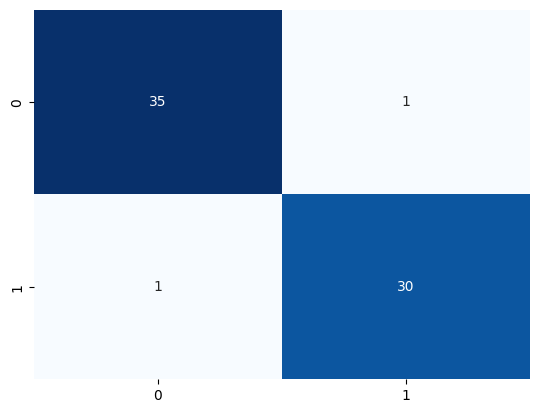

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

Precision-Recall curve

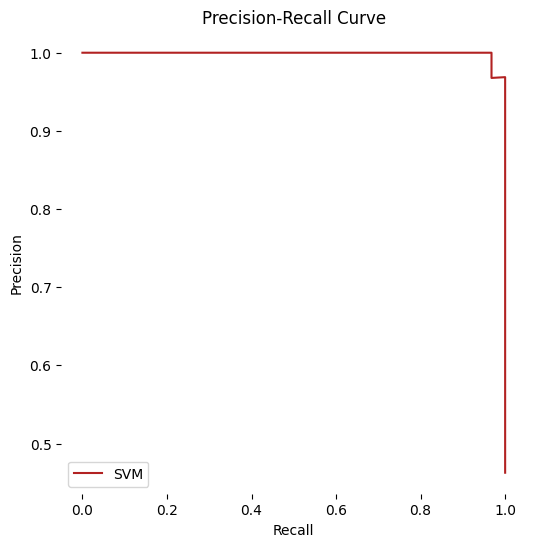

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

AUC/ROC Curve

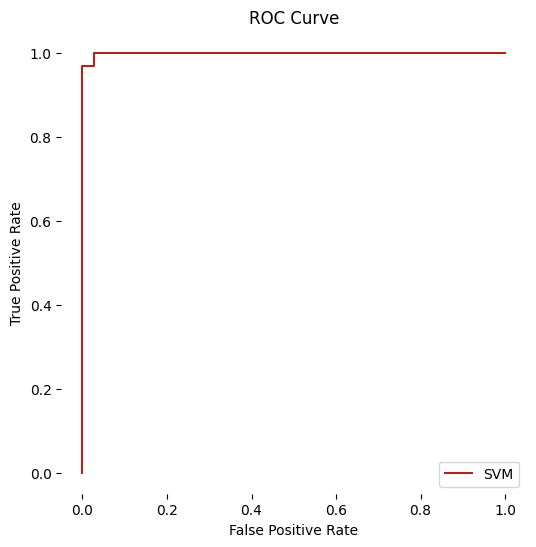

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

Visualization predictions

<ipython-input-83-96a99ac33840>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


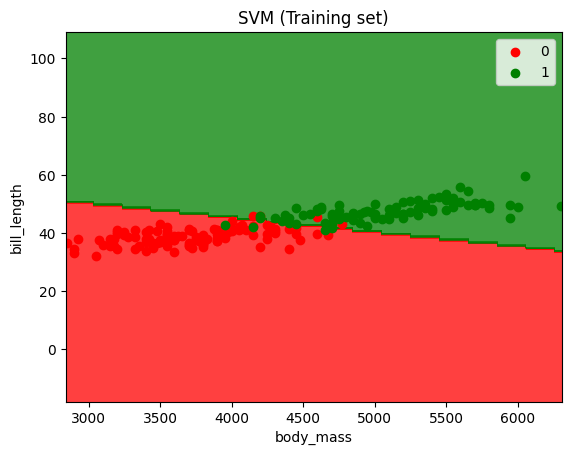

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 50, stop = X_set[:, 1].max() + 50, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('body_mass')
plt.ylabel('bill_length')
plt.legend()
plt.show()

Prediction results on the test set

<ipython-input-84-c900a516b42d>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


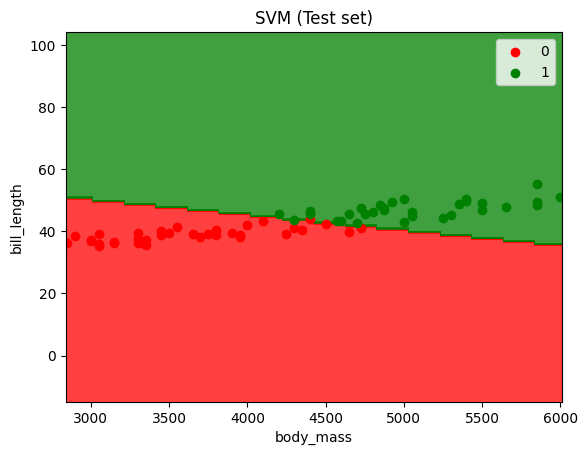

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 50, stop = X_set[:, 1].max() + 50, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('body_mass')
plt.ylabel('bill_length')
plt.legend()
plt.show()

In [ ]:
print(classifier.predict(sc.transform([[45, 5300]])))

[1]


## Analisis

Berdasarkan hasil evaluasi, kedua model, Naive Bayes dan SVM, menunjukkan kinerja yang sangat baik dengan akurasi mencapai 0.97 dan F1 Score mencapai 0.967741935483871. Kedua model berhasil mengklasifikasikan dengan tepat 97% dari data uji. <br>

Performa yang mengesankan ini menunjukkan bahwa kedua model efektif dalam menangani tugas klasifikasi. Namun, dengan akurasi yang sama, tidak ada model yang secara jelas lebih unggul dari yang lain. Untuk menentukan model yang lebih baik, diperlukan evaluasi lebih lanjut pada dataset yang lebih besar atau dengan tugas klasifikasi yang lebih kompleks. <br>


Kesimpulan : Hasil Evaluasi pada dataset penguins.csv baik naive bayes dan SVM didapatkan hasil yang sama.




# **Dataset 2 : Diabetes RS1**

Deskripsi Dataset : <br>
Dataset yang disajikan merupakan data terkait pasien diabetes, dengan kolom-kolom sebagai berikut: <br>

* Pregnancies: Jumlah kali hamil.
* Glucose: Konsentrasi glukosa .
* BloodPressure: Tekanan darah diastolik (mm Hg).
* SkinThickness: Ketebalan lipatan kulit trisep (mm).
* Insulin: Kadar insulin.
* BMI (Body Mass Index): Indeks massa tubuh, dihitung sebagai berat (kg) / (tinggi dalam meter)^2.
* DiabetesPedigreeFunction: Fungsi silsilah diabetes, mengukur sejauh mana  riwayat diabetes dalam keluarga dapat memprediksi kecenderungan seseorang untuk diabetes.
* Age: Umur pasien.
* Outcome: Variabel target yang menunjukkan apakah pasien mengidap diabetes atau tidak (1 untuk diabetes, 0 untuk tidak).


### Loading Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PrakDamin/diabetes_RS1.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Data preprocessing

Describe data

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Glucose', ylabel='Count'>

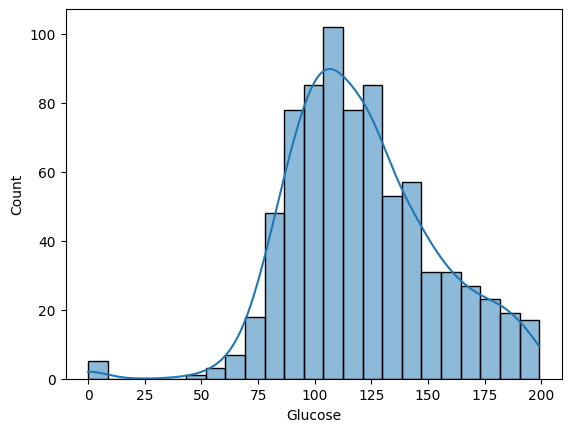

In [ ]:
sns.histplot(df['Glucose'], kde = True)

Corelation matrix

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


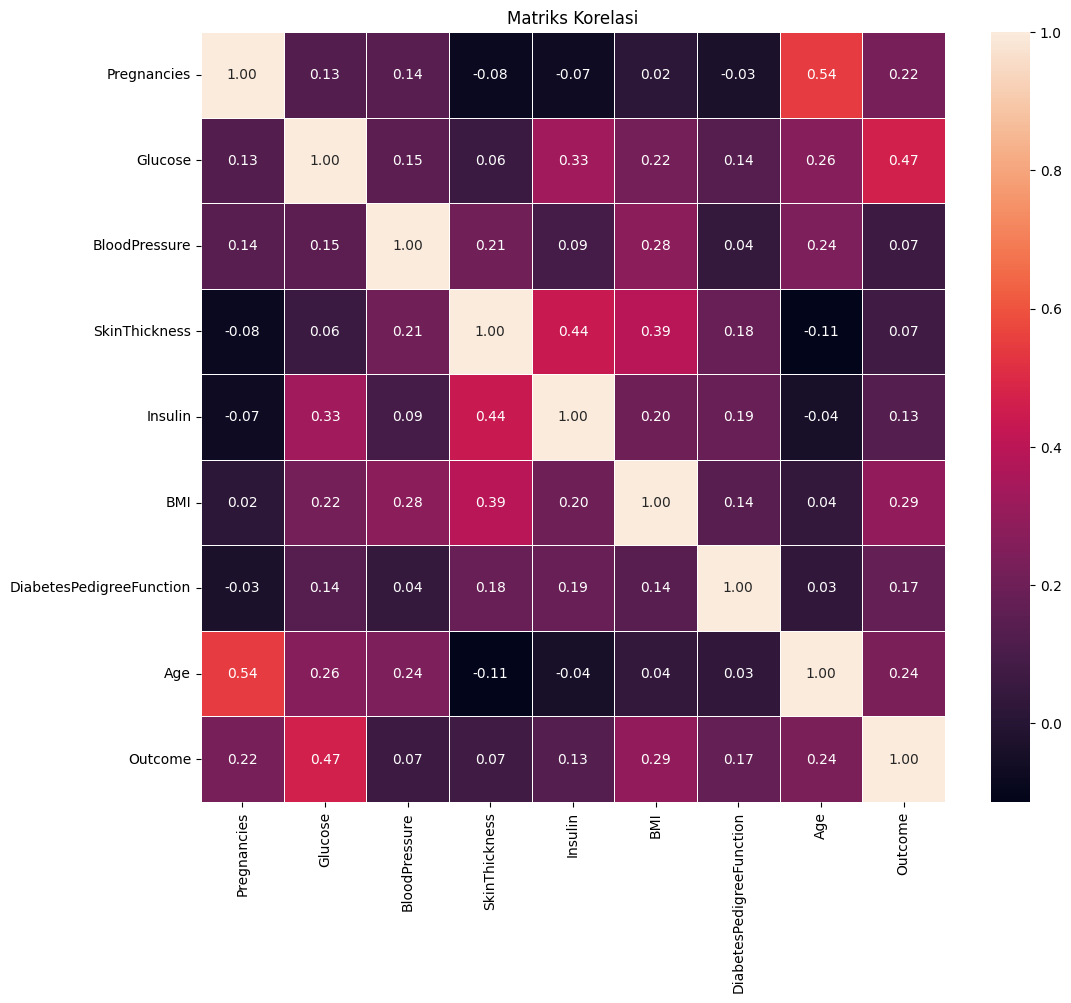

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

### Modeling

split data

In [ ]:
# Split data into dependent/independent variables
X = df[['Glucose','Insulin']].values
y = df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((576, 2), (192, 2))

### Features Scalling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predict result/ Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

### Model Evaluation

Accuracy

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.75


Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       123
           1       0.73      0.48      0.58        69

    accuracy                           0.75       192
   macro avg       0.74      0.69      0.70       192
weighted avg       0.75      0.75      0.73       192



F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.5789473684210527


Confusion Matrix

<Axes: >

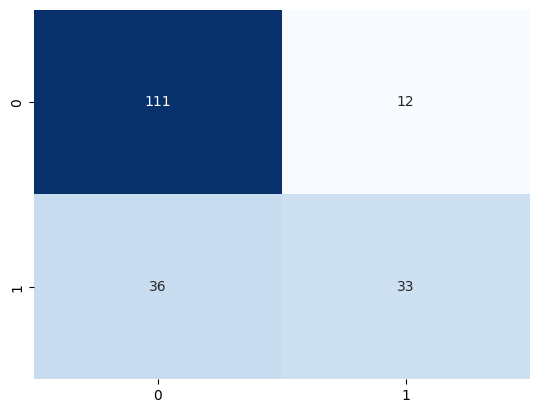

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

Precision-Recall curve

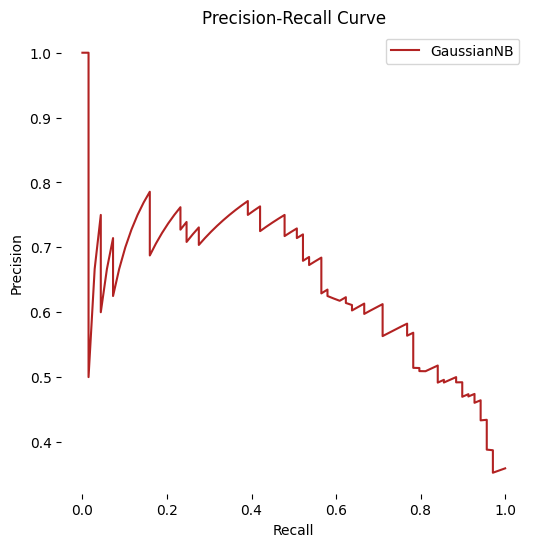

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='GaussianNB', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

AUC/ROC Curve

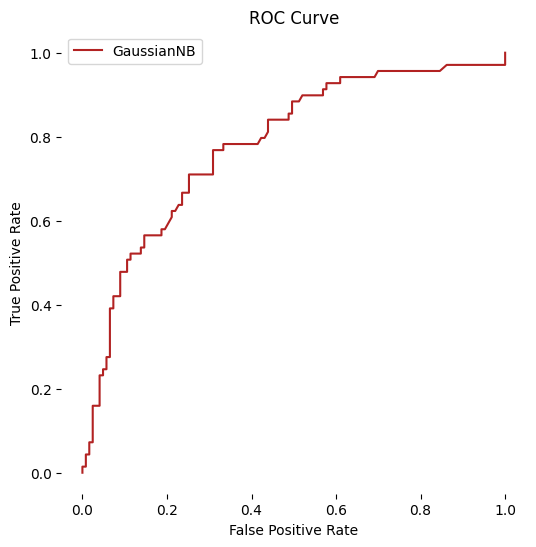

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='GaussianNB', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

 Visualization predictions

<ipython-input-102-849818c7d771>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


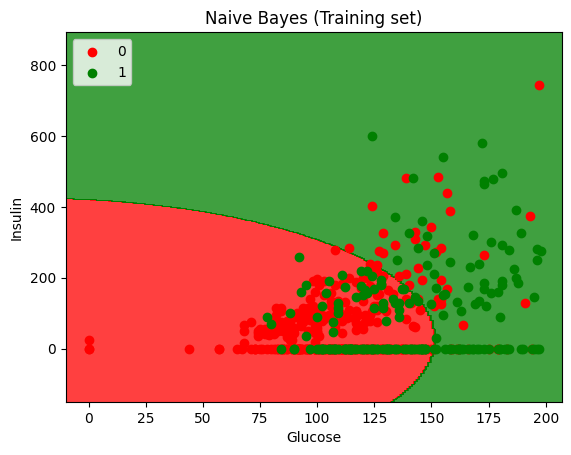

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 150, stop = X_set[:, 1].max() + 150, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

<ipython-input-103-1ccf8fe5dd15>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


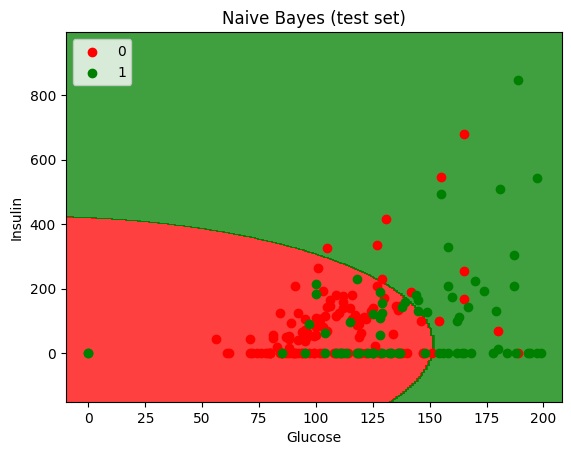

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 150, stop = X_set[:, 1].max() + 150, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

Test

In [ ]:
print(classifier.predict(sc.transform([[275, 600]])))

[1]


## **Klasifikasi Support Vector Machine(SVM)**

### Split Data

In [ ]:
from sklearn.model_selection import train_test_split

# Split data into dependent/independent variables
X = df[['Glucose','Insulin']].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((576, 2), (192, 2))

### Features Scalling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Model

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predict result/ Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]

### Model Evaluation

Accuracy

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.77


Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       123
           1       0.76      0.51      0.61        69

    accuracy                           0.77       192
   macro avg       0.76      0.71      0.72       192
weighted avg       0.76      0.77      0.75       192



F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.6086956521739131


Confusion Matrix

<Axes: >

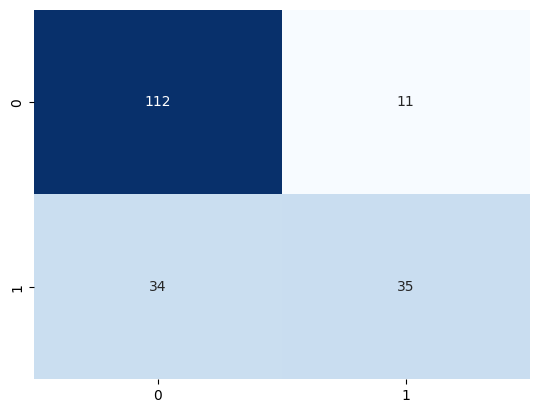

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

Precision-Recall curve

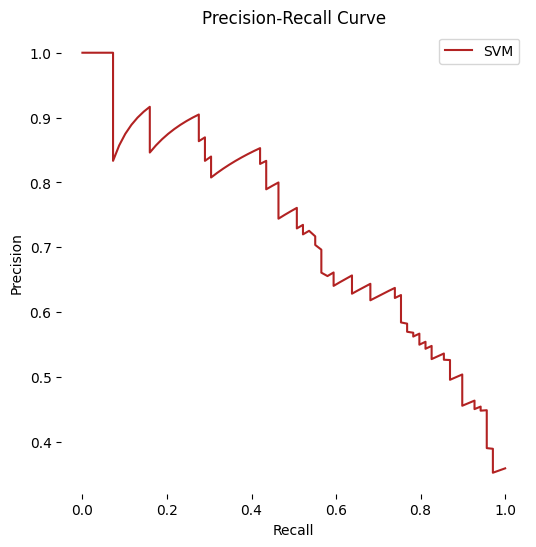

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

AUC/ROC Curve

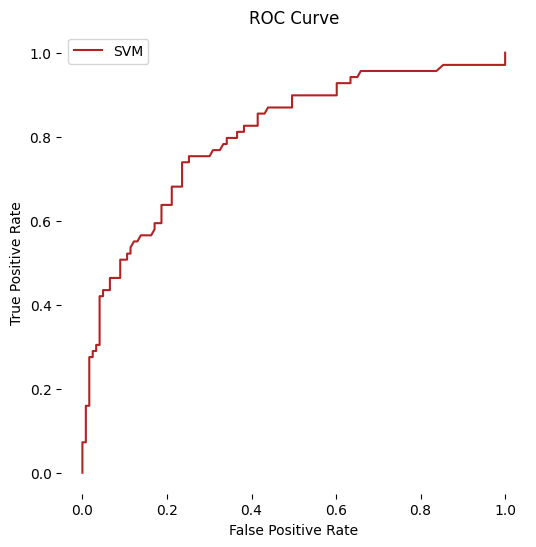

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### Visualization predictions

<ipython-input-115-f45cde96ee1c>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


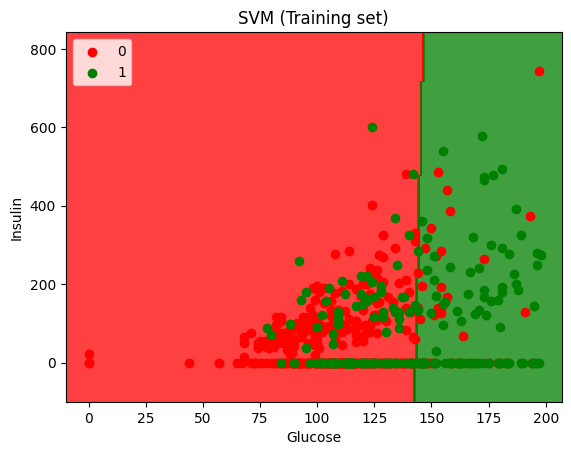

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 100, stop = X_set[:, 1].max() + 100, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

<ipython-input-116-64ce0bc0e8b0>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


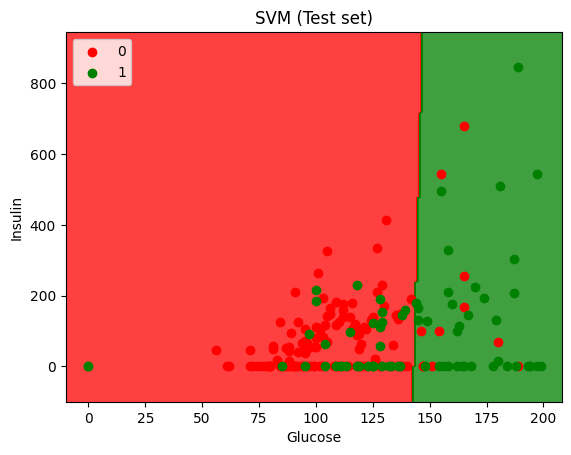

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 100, stop = X_set[:, 1].max() + 100, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend()
plt.show()

Test

In [ ]:
print(classifier.predict(sc.transform([[275, 600]])))

[1]


## Analisis :
Berdasarkan hasil evaluasi, model SVM menunjukkan kinerja yang sedikit lebih baik dibandingkan model Naive Bayes. Model SVM mencapai akurasi 0.77 dan F1 Score 0.6086956521739131, sedangkan model Naive Bayes mencapai akurasi 0.75 dan F1 Score 0.5789473684210527. <br>

Perbedaan utama antara kedua model terlihat pada recall untuk kelas minoritas (kelas 1). Model SVM memiliki recall 0.51, sedangkan model Naive Bayes memiliki recall 0.48. Ini berarti bahwa model SVM lebih berhasil dalam mengidentifikasi contoh-contoh kelas minoritas dengan benar. <br>

Secara keseluruhan, kedua model menunjukkan kinerja yang cukup baik, tetapi model SVM sedikit lebih unggul dalam tugas klasifikasi ini. Namun, perlu dicatat bahwa kinerja model dapat bervariasi tergantung pada dataset dan tugas klasifikasi yang spesifik. <br>

# **Dataset 3 : Student.csv**

Deskripsi dataset : <br>
Dataset yang disajikan merupakan data mahasiswa dengan beberapa atribut. Berikut adalah deskripsi setiap kolom: <br>

* Student_id: Nomor identifikasi unik untuk setiap mahasiswa.
* Age: Umur mahasiswa.
* Gender: Jenis kelamin mahasiswa (Male/Female).
* Grade: Kelas/Grade yang diperoleh mahasiswa (1st Class, 2nd Class, dll.).
* Employed: Indikator apakah mahasiswa sudah bekerja atau belum (yes/no).

### Loading data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/PrakDamin/student.csv')
df.head()

,Student_id,Age,Gender,Grade,Employed
0,1,19,Male,1st Class,yes
1,2,20,Female,2nd Class,no
2,3,18,Male,1st Class,no
3,4,21,Female,2nd Class,no
4,5,19,Male,1st Class,no


### Data Preprocessing

Drop Data

In [ ]:
df = df.drop(["Student_id"], axis=1)
df.head()

,Age,Gender,Grade,Employed
0,19,Male,1st Class,yes
1,20,Female,2nd Class,no
2,18,Male,1st Class,no
3,21,Female,2nd Class,no
4,19,Male,1st Class,no


Describe Data

In [ ]:
df.describe()

,Age
count,232.000000
mean,19.896552
std,1.030944
min,18.000000
25%,19.000000
50%,20.000000
75%,21.000000
max,22.000000


Distribution Data

<Axes: xlabel='Age', ylabel='Count'>

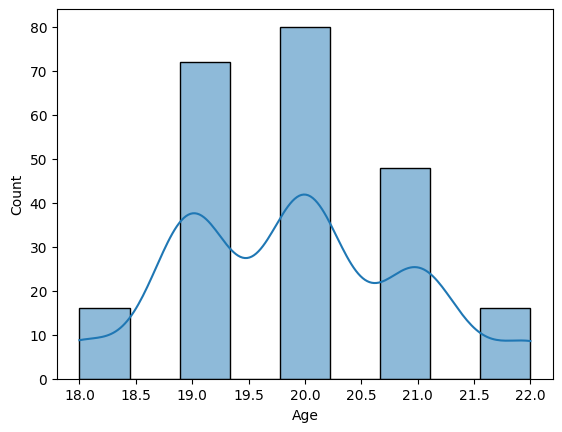

In [ ]:
sns.histplot(df['Age'], kde = True)

Labeling Encoding

In [ ]:
df_categorical = df.select_dtypes(exclude = [np.number])#membueat  variabel yang berisi tabel tanpa kolom yang memiliki tipe data numerik
df_categorical

,Gender,Grade,Employed
0,Male,1st Class,yes
1,Female,2nd Class,no
2,Male,1st Class,no
3,Female,2nd Class,no
4,Male,1st Class,no
...,...,...,...
227,Female,1st Class,no
228,Male,2nd Class,no
229,Male,3rd Class,yes
230,Female,1st Class,yes


In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.replace({'Male': 1, 'Female': 0},inplace = True)
df.head()

,Age,Gender,Grade,Employed
0,19,1,1st Class,yes
1,20,0,2nd Class,no
2,18,1,1st Class,no
3,21,0,2nd Class,no
4,19,1,1st Class,no


In [ ]:
df['Grade'].unique()

array(['1st Class', '2nd Class', '3rd Class'], dtype=object)

In [ ]:
df.replace({'1st Class':1, '2nd Class':2, '3rd Class':3},inplace = True)
df.head()

,Age,Gender,Grade,Employed
0,19,1,1,yes
1,20,0,2,no
2,18,1,1,no
3,21,0,2,no
4,19,1,1,no


In [ ]:
df['Employed'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
df.replace({'yes':1, 'no':0},inplace = True)
df.head()

,Age,Gender,Grade,Employed
0,19,1,1,1
1,20,0,2,0
2,18,1,1,0
3,21,0,2,0
4,19,1,1,0


### Corelation Matrix

In [ ]:
df.corr()

,Age,Gender,Grade,Employed
Age,1.000000,-0.084487,0.294436,0.14606
Gender,-0.084487,1.000000,-0.310482,-0.00061
Grade,0.294436,-0.310482,1.000000,0.14641
Employed,0.146060,-0.000610,0.146410,1.00000


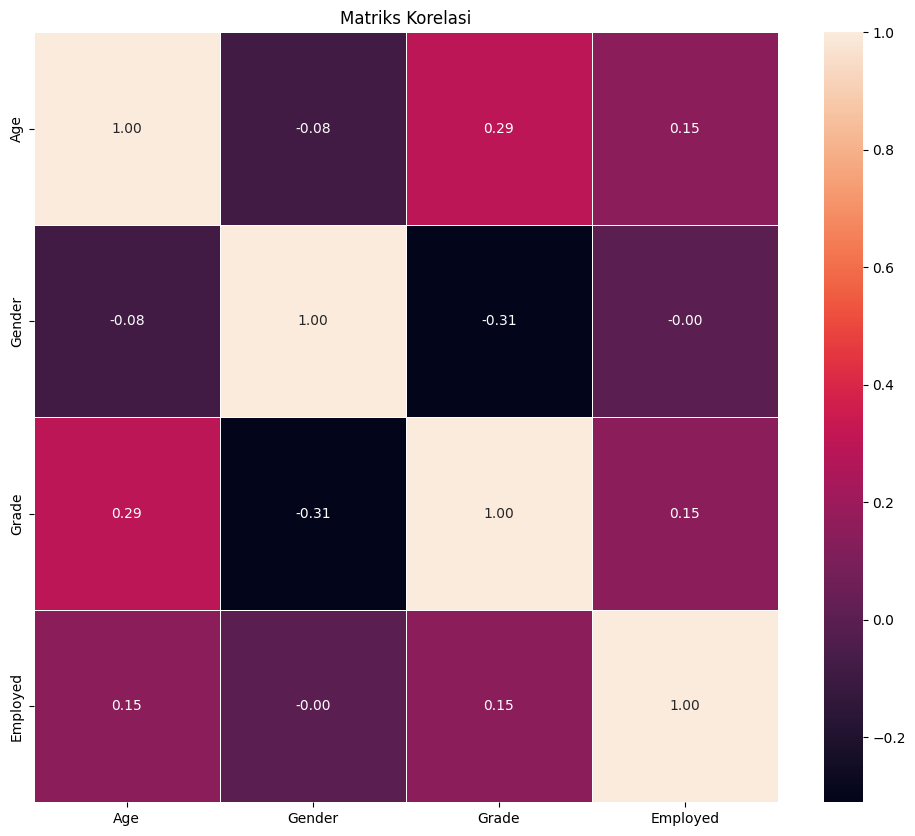

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi")
plt.show()

### Modelling

Split Data

In [ ]:
# Split data into dependent/independent variables
X = df[['Grade','Age']].values
y = df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((174, 2), (58, 2))

### Features Scalling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predict result/ Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 1]
 [0 0]]


### Model Evaluation

Accuracy

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.59


Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.61      0.82      0.70        34
           1       0.50      0.25      0.33        24

    accuracy                           0.59        58
   macro avg       0.55      0.54      0.52        58
weighted avg       0.56      0.59      0.55        58



F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.3333333333333333


Confusion Matrix

<Axes: >

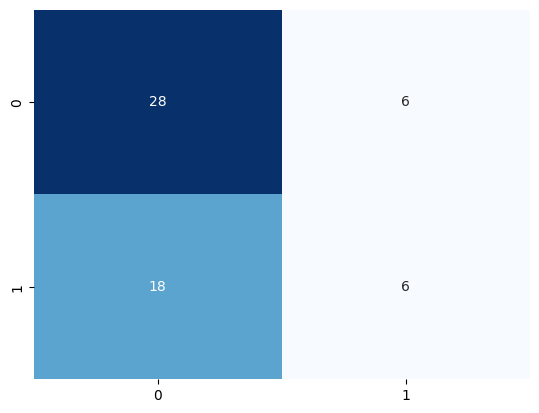

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

Precision-Recall curve

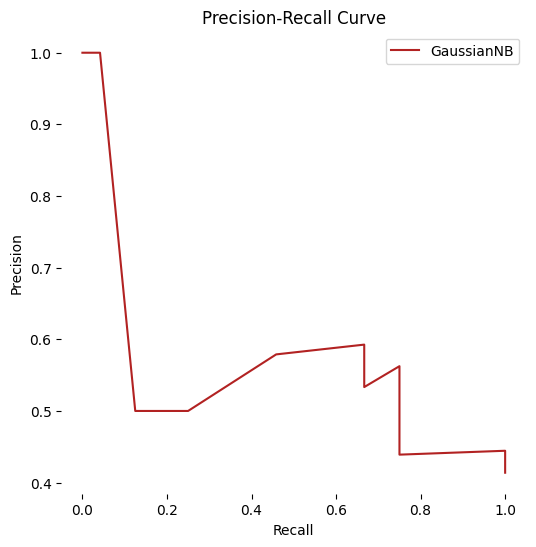

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.predict_proba (X_test) [:,1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='GaussianNB', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

AUC/ROC Curve

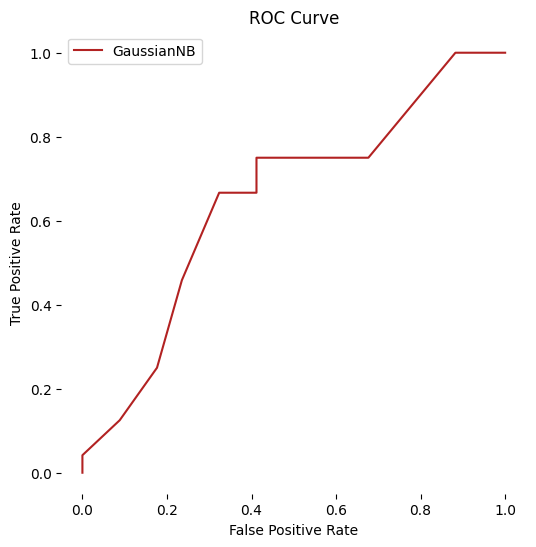

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.predict_proba(X_test) [:,1]
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='GaussianNB', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### Visualization predictions

<ipython-input-142-0a1bcf702244>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


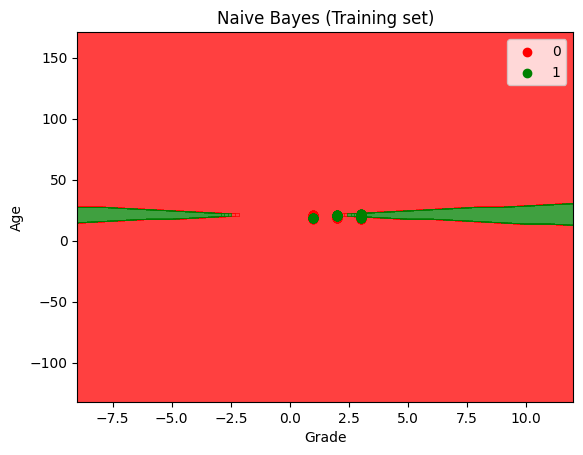

In [ ]:
# Visualize prediction results on training set

X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 150, stop = X_set[:, 1].max() + 150, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training set)')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.legend()
plt.show()

<ipython-input-143-fa96587a7a62>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


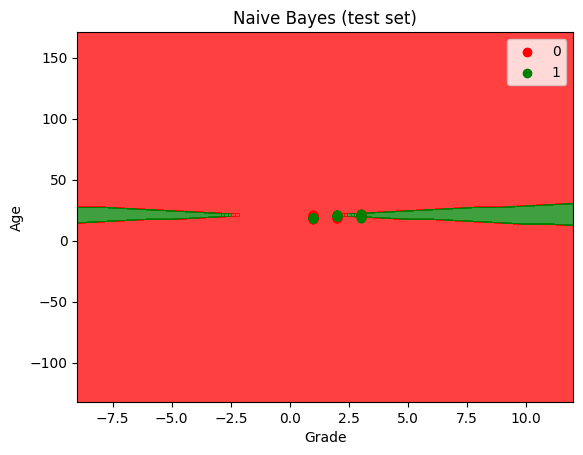

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 150, stop = X_set[:, 1].max() + 150, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (test set)')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.legend()
plt.show()

## **Klasifikasi Support Vector Machine(SVM)**

### Split Data

In [ ]:
# Split data into dependent/independent variables
X = df[['Grade','Age']].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X,y,
random_state = 1, test_size = .25)

X_train.shape, X_test.shape

((174, 2), (58, 2))

### Features Scalling

In [ ]:
# Scale dataset
sc = StandardScaler ()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Train Model

In [ ]:
classifier = SVC(kernel = 'linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

### Predict result/ Score Model

In [ ]:
y_pred = classifier.predict(X_test)
print (np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)), 1))

[[0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 0]]


### Model Evaluation

Accuracy

In [ ]:
acc = accuracy_score(y_pred, y_test)
print('Test set accurat %4.2f' % (acc))

Test set accurat 0.59


Classification report

In [ ]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        34
           1       0.00      0.00      0.00        24

    accuracy                           0.59        58
   macro avg       0.29      0.50      0.37        58
weighted avg       0.34      0.59      0.43        58



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score

In [ ]:
print(f'F1 Score: {f1_score(y_test, y_pred)}')

F1 Score: 0.0


Confusion Matrix

<Axes: >

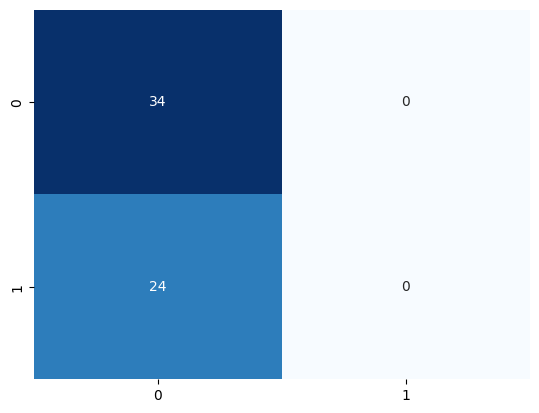

In [ ]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap = 'Blues', cbar=False)

Precision-Recall curve

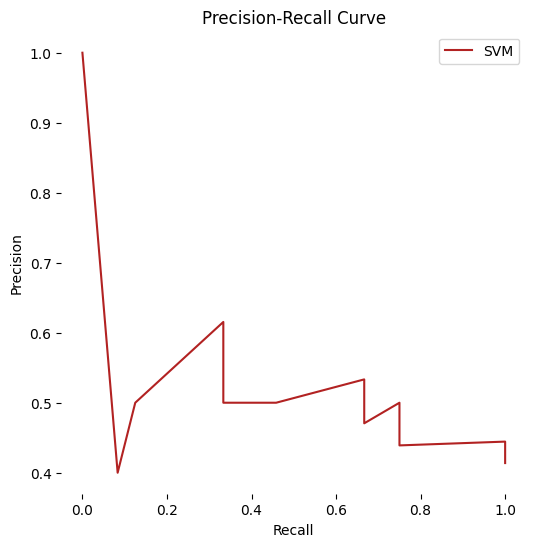

In [ ]:
# Plot Precision-Recall Curve
y_pred_proba = classifier.decision_function (X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

fig, ax = plt.subplots(figsize = (6,6))
ax.plot(recall, precision, label='SVM', color = 'firebrick')
ax.set_title('Precision-Recall Curve')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
plt.box (False)
ax.legend();

AUC/ROC Curve

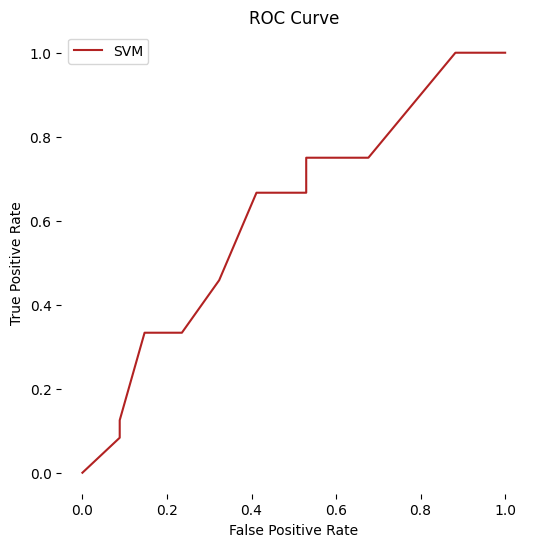

In [ ]:
# Plot AUC/ROC curve
y_pred_proba = classifier.decision_function(X_test)
fpr, tpr, thresholds = metrics.roc_curve (y_test, y_pred_proba)

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(fpr, tpr, label='SVM', color = 'firebrick')
ax.set_title('ROC Curve')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
plt.box(False)
ax.legend();

### Visualization predictions

<ipython-input-157-9f7594c75a1c>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


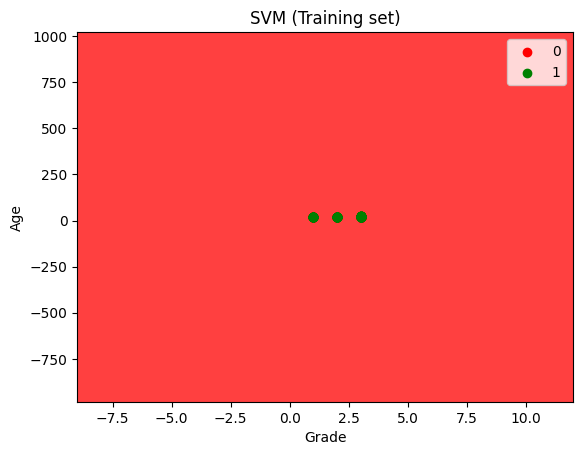

In [ ]:
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.legend()
plt.show()

<ipython-input-158-017f738f65b0>:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


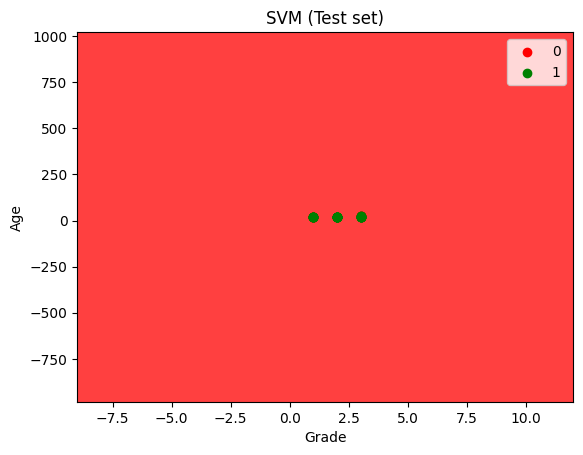

In [ ]:
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(X_set[y_set == j, 0], X_set[y_set==j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Grade')
plt.ylabel('Age')
plt.legend()
plt.show()

## Analisis
Berdasarkan hasil evaluasi, kedua model, Naive Bayes dan SVM, menunjukkan kinerja yang kurang baik dengan akurasi mencapai 0.59. Namun, model SVM menunjukkan hasil yang lebih buruk dibandingkan model Naive Bayes dalam hal recall untuk kelas minoritas (kelas 1). Model SVM memiliki recall 0.00, sedangkan model Naive Bayes memiliki recall 0.25. Ini berarti bahwa model SVM tidak berhasil mengidentifikasi contoh-contoh kelas minoritas dengan benar. <br>

Secara keseluruhan, kedua model tidak menunjukkan kinerja yang memuaskan dalam tugas klasifikasi ini. Hal ini dikarenakan tidak cocoknya dataset dengan model yang digunakan. <br>

Dataset yang digunakan dalam evaluasi ini memiliki kelas minoritas yang sangat kecil, yaitu hanya 24 contoh dari 58 contoh total. Hal ini menyebabkan model menjadi kesulitan untuk mempelajari pola dari kelas minoritas. <br>

Untuk meningkatkan kinerja model, diperlukan dataset yang lebih besar dan seimbang antara kelas mayoritas dan minoritas. Selain itu, dapat juga dilakukan teknik-teknik tertentu untuk meningkatkan kemampuan model dalam mengidentifikasi kelas minoritas, seperti oversampling atau undersampling.